In [1]:
!pip install Gpy

  Running setup.py bdist_wheel for paramz: started
  Running setup.py bdist_wheel for paramz: finished with status 'done'
  Stored in directory: C:\Users\H\AppData\Local\pip\Cache\wheels\a9\fc\74\3bbd263c43ed98d67343df24cebf0a0ee34afee40d769fda9c
Successfully built paramz


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import GPy
import numpy as np 
import matplotlib.pyplot as plt
# %matplotlib notebook

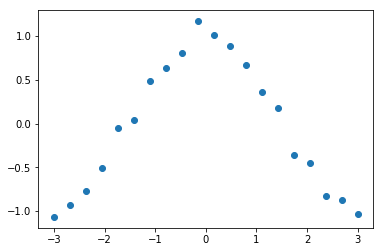

In [2]:
def data_gen(N): 
    x = np.linspace(-3,3,N)
    y = np.cos(x)
    y = y + np.random.normal(0,0.1,size=N)
    return x, y
N = 20
data_x, data_y = data_gen(N)
plt.scatter(data_x, data_y)
plt.show()
data_x, data_y = data_x.reshape(N,1), data_y.reshape(N,1)

In [3]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(data_x,data_y,kernel)
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x1c66860e240>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1c66860e0f0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1c66860e748>]}

 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


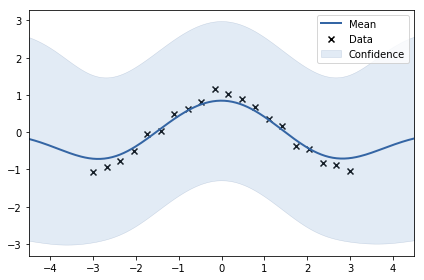

In [4]:
m.plot()

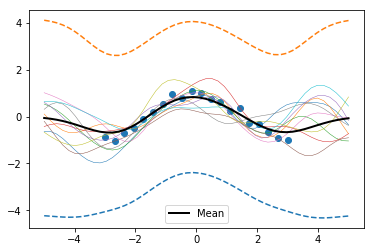

In [13]:
X = np.linspace(-5,5,50).reshape(-1,1)
pos_samples = m.posterior_samples_f(X, size=10)
means, var = m.predict(X)
for _ in range(10):
    plt.plot(X, pos_samples[:,:,_], linewidth=0.5)
plt.plot(X, means, color='black', label='Mean', linewidth=2.0)
plt.plot(X, means-2.96*var**0.5, linestyle='--')
plt.plot(X, means+2.96*var**0.5, linestyle='--')
plt.scatter(data_x, data_y)
plt.legend()
plt.show()

{'dataplot': [<matplotlib.collections.PathCollection at 0x1ec35a0c080>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1ec37831a20>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1ec378d82e8>]}

 C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


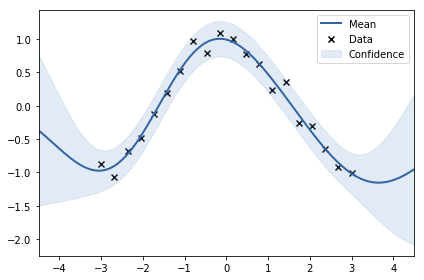

In [14]:
m.optimize(messages=True)
m.plot()